In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Load Train Data
rawdata = pd.read_csv('../data/raw/train_aggr.csv',sep=';')

In [6]:
rawdata.head()

,id_pos,fecha_venta_norm,canal,unidades,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
0,3142,2012-12-01,ALMACEN,12,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
1,3142,2013-12-01,ALMACEN,7,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
2,3143,2013-11-01,ALMACEN,2,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
3,3143,2013-12-01,ALMACEN,47,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
4,3144,2012-11-01,ALMACEN,6,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233


In [7]:
rawdata.shape

(34540, 36)

In [8]:
rawdata['fecha_venta_norm'] = pd.to_datetime(rawdata['fecha_venta_norm'])

In [9]:
rawdata['fecha_venta_norm'] = rawdata['fecha_venta_norm'].dt.date

In [10]:
rawdata['year'] = pd.to_datetime(rawdata.fecha_venta_norm).dt.year
rawdata['month'] = pd.to_datetime(rawdata.fecha_venta_norm).dt.month

In [11]:
# Filtramos los meses que consideramos buenos para el entrenamiento (11 y 12)
rawdata = rawdata[rawdata.fecha_venta_norm.isin([date(2012, 11, 1),
                                                 date(2012, 12, 1),
                                                 date(2013, 11, 1), 
                                                 date(2013, 12, 1), 
                                                 date(2014, 11, 1)])]

In [12]:
rawdata.shape

(33960, 38)

In [10]:
rawdata.head(10)

,id_pos,fecha_venta_norm,canal,unidades,competidores,ingreso_mediana,ingreso_promedio,densidad_poblacional,pct_0a5,pct_5a9,...,pct_bachelors,pct_doctorados,pct_secundario,pct_master,pct_bicicleta,pct_omnibus,pct_subtes,pct_taxi,pct_caminata,mediana_valor_hogar
0,3142,2012-12-01,ALMACEN,12,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
1,3142,2013-12-01,ALMACEN,7,12.0,50395.31667,68263.48667,17239.673330,6.796667,6.110000,...,17.613333,1.333333,27.63,7.396667,0.260000,6.733333,0.72,0.210,3.793333,252050.3467
2,3143,2013-11-01,ALMACEN,2,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
3,3143,2013-12-01,ALMACEN,47,33.0,55256.52333,70989.74667,67764.126670,6.316667,5.903333,...,15.970000,0.936667,29.50,7.560000,0.366667,8.410000,22.81,0.240,3.006667,391646.2067
4,3144,2012-11-01,ALMACEN,6,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233
5,3144,2012-12-01,ALMACEN,41,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233
6,3144,2013-11-01,ALMACEN,4,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233
7,3144,2013-12-01,ALMACEN,71,38.0,43437.32000,58236.36500,8799.223333,7.270000,7.240000,...,15.360000,1.841667,28.13,6.546667,0.183333,1.466667,0.00,0.025,1.518333,137570.5233
8,3146,2012-12-01,ALMACEN,7,5.0,24541.12000,38500.06000,9049.910000,5.310000,4.650000,...,11.740000,0.660000,31.23,3.880000,0.420000,0.410000,0.00,0.000,7.590000,112830.8300
9,3146,2013-12-01,ALMACEN,7,5.0,24541.12000,38500.06000,9049.910000,5.310000,4.650000,...,11.740000,0.660000,31.23,3.880000,0.420000,0.410000,0.00,0.000,7.590000,112830.8300


In [13]:
rawdata = rawdata[(rawdata.month == 12)]

In [14]:
predictors = ['id_pos','unidades', 'canal', 'competidores',
       'ingreso_mediana', 'densidad_poblacional',
       'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24',
       'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44', 'pct_45a49',
       'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69', 'pct_70a74',
       'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors',
       'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta',
       'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata',
       'mediana_valor_hogar']

In [15]:
X = rawdata[predictors].copy()

In [16]:
y = rawdata.unidades

In [17]:
X.drop('unidades', inplace=True, axis=1)

In [18]:
# fill Nans
for c in X.columns[X.dtypes != 'object']:
    X[c].fillna(X[c].median(), inplace=True)

In [19]:
# Label encoder
for c in X.columns[X.dtypes == 'object']:
    X[c] = X[c].factorize()[0]

#### Training Random Forest Regressor

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
rf = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=200,criterion='mae',n_jobs=-1)

In [22]:
model = rf.fit(X_train, y_train)


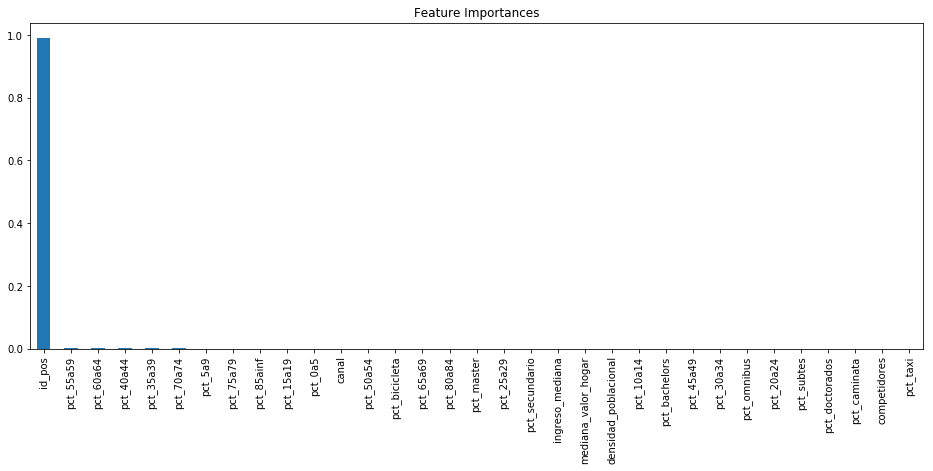

In [25]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(16,6))
pass


In [26]:
y_pred = model.predict(X_test)

In [27]:
mean_absolute_error(y_test, y_pred)

13.034635640200287

In [28]:
mean_squared_error(y_test, y_pred)

406.7173048607385

In [29]:
np.median(y_pred)

14.8725

In [30]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [31]:
mean_absolute_error(y_test, y_pred_fixed)

13.034635640200287